# FEATURE DESCRIPTIONS

- age: Age of the patient (Numeric).
- sex: Gender of the patient. Values: 1 = male, 0 = female.
- cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.
- trestbps: Resting Blood Pressure (in mm Hg) (Numeric).
- chol: Serum Cholesterol level (in mg/dl) (Numeric).
- fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
- restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
- thalach: Maximum heart rate achieved (Numeric).
- exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
- oldpeak: ST depression induced by exercise relative to rest (Numeric).
- slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
- ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.
- thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
- target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.

# EDA

In [999]:
import pandas as pd

df = pd.read_csv("raw_merged_heart_dataset.csv")

print(df)

      age  sex  cp trestbps chol fbs restecg thalachh exang  oldpeak slope ca  \
0      63    1   3      145  233   1       0      150     0      2.3     0  0   
1      37    1   2      130  250   0       1      187     0      3.5     0  0   
2      41    0   1      130  204   0       0      172     0      1.4     2  0   
3      56    1   1      120  236   0       1      178     0      0.8     2  0   
4      57    0   0      120  354   0       1      163     1      0.6     2  0   
...   ...  ...  ..      ...  ...  ..     ...      ...   ...      ...   ... ..   
2176   60    1   0      140  207   0       0      138     1      1.9     2  1   
2177   46    1   0      140  311   0       1      120     1      1.8     1  2   
2178   59    1   3      134  204   0       1      162     0      0.8     2  2   
2179   54    1   1      154  232   0       0      164     0      0.0     2  1   
2180   53    1   0      110  335   0       1      143     1      3.0     1  1   

     thal  target  
0      

In [1000]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalachh     object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object


First, let's look into numerical features

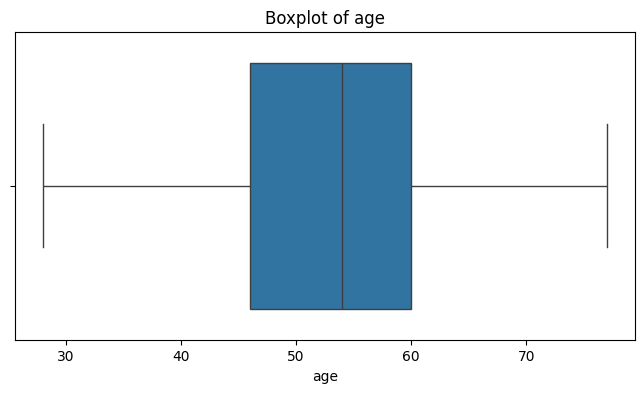

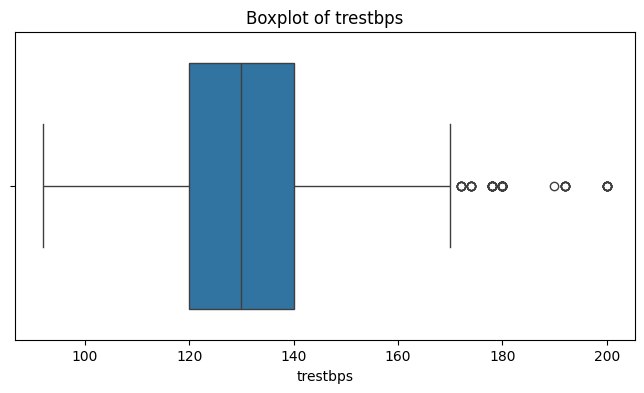

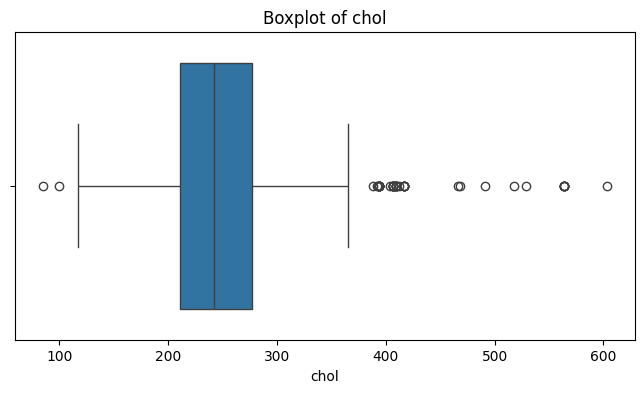

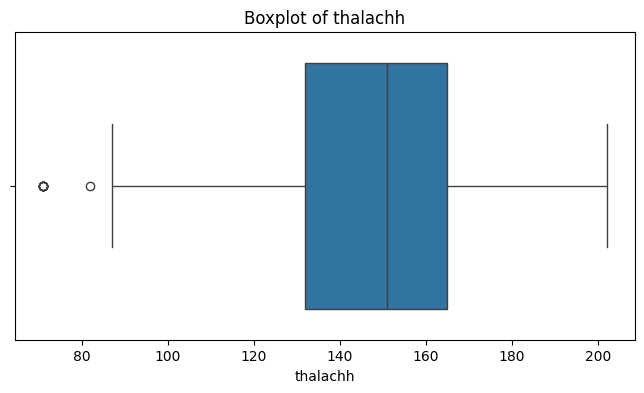

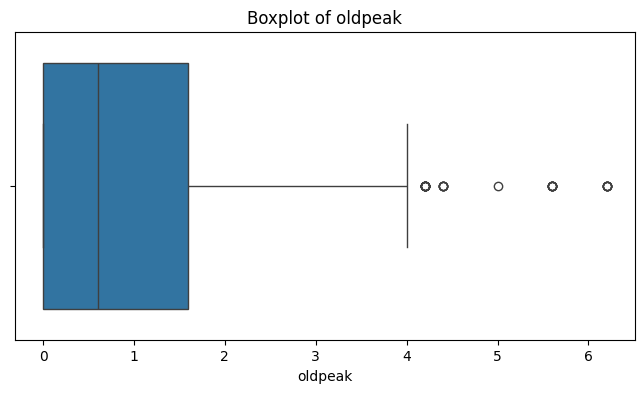

In [1001]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']

for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


Most of patients are between 45 and 60 years old. The youngest are around 28 years old and the oldest are closer to 80.

Resting blood pressure (trestbps) is concentrated between 120 and 140 mmHg. There are a few outliers with exceptionally high values. One even has 200 mmHg.

Serum Cholesterol (chol) levels are mostly between 200 and slightly under 300 mg/dl. Without the outliers, Cholesterol levels range from a little over 100 to around 350 mg/dl which is a large scale. There are multiple outliers, only two with lower values and rest being very high. Most of the outliers are around 400 and one even at 600.

Most of the maximum achieved heartrates (thalachh) ranges from 130 until 165 bpm. The whole range is from 90 until 200 with couple outliers being lower 90 which seems unusual.

ST depression induced by exercise relative to rest (oldpeak) is mostly from 0 to 1.5 with some outliers up to over 6.

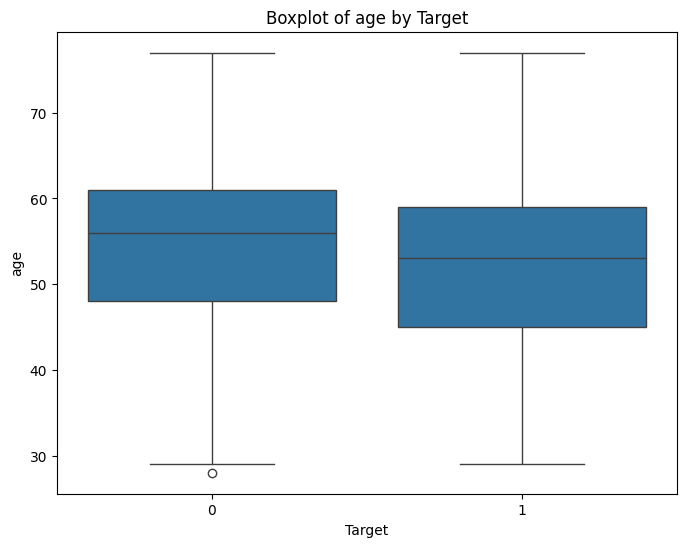

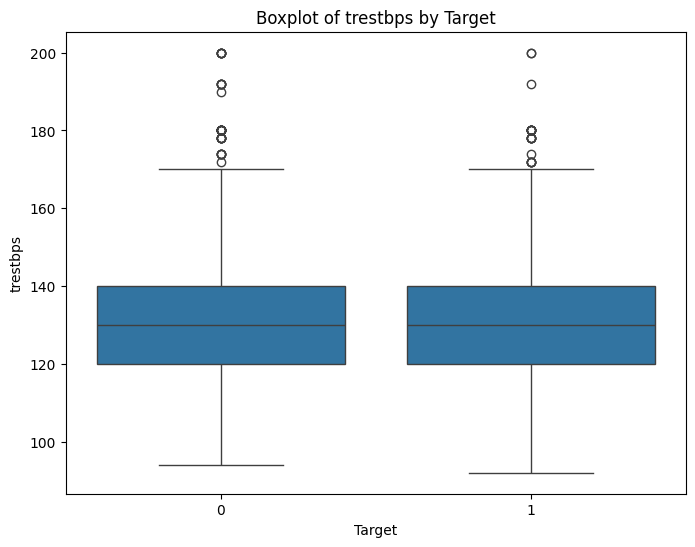

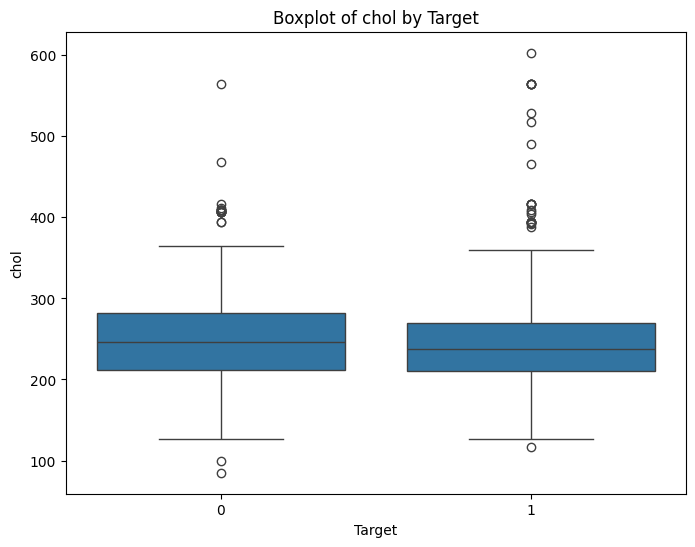

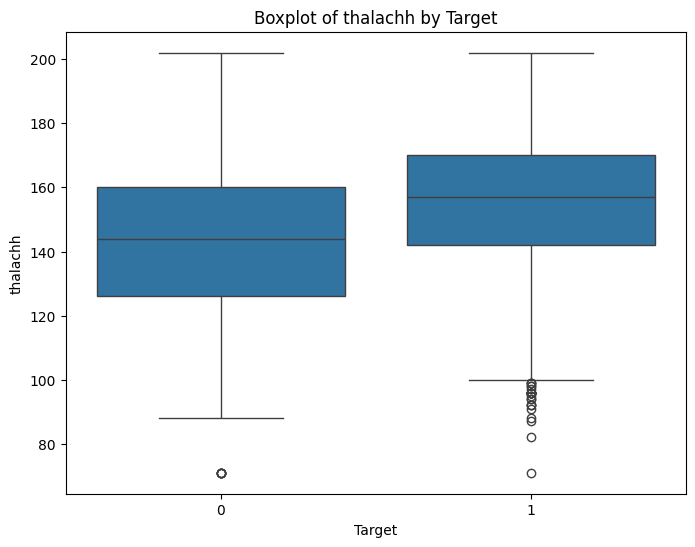

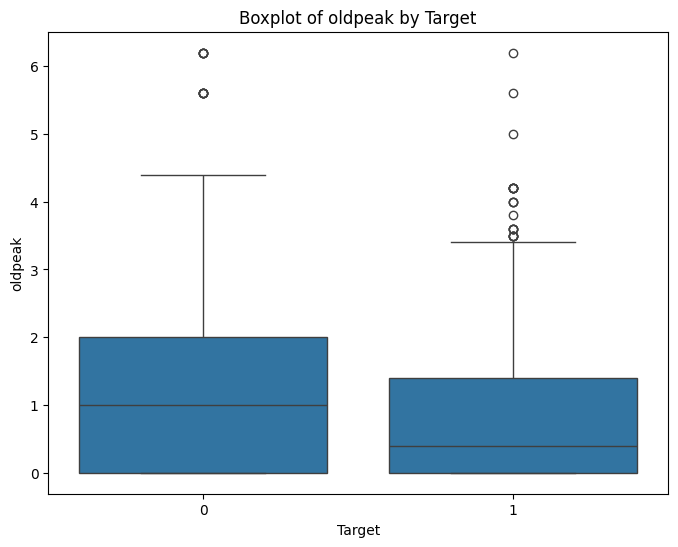

In [1002]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

Most of the features have a similar spread and overlaps a lot between the two different target values. This means that they are not very decisive features on their own. Higher maximum heart rate achieved (thalach) seems to higher the chance of a heartattack. A higher ST depression induced by exercise relative to rest (oldpeak) seems to lower the chances of a heartattack which intuitively does not make sense.

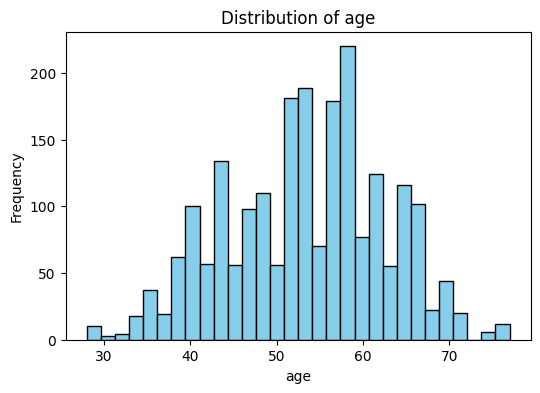

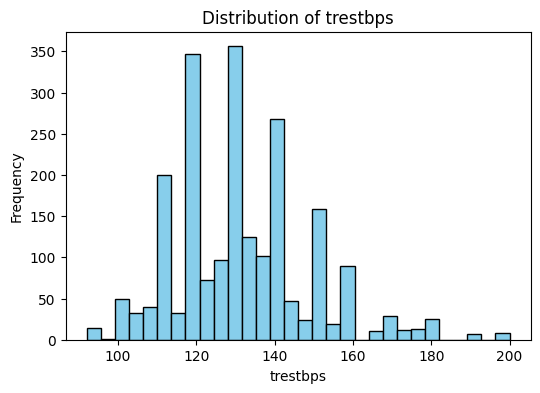

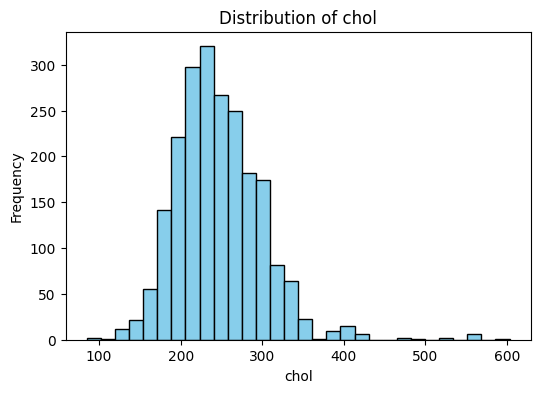

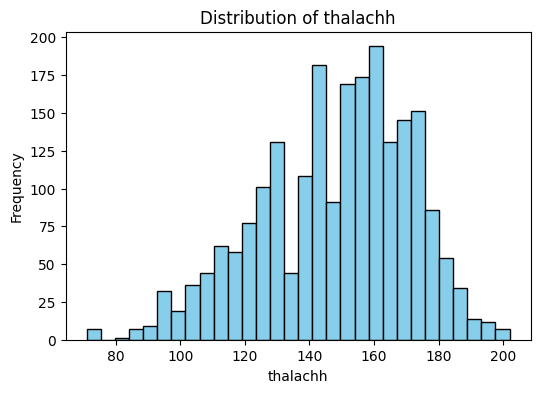

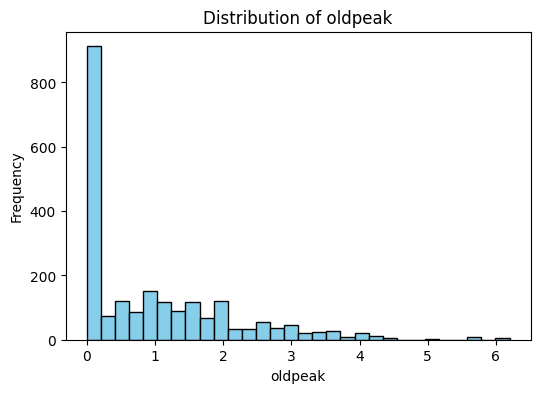

In [1003]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Most of the distributions are fairly symmetric. Cholesterol and threstbps has clearly more outliers on the higher end than age and cholesterol. Thalachh is a little bit left sqewed but overall very symmetric. Oldpeak is extremely right sqewed with 0 being an extremely dominant value. It has nearly 900 cases while the second highest value is under 200. The distribution might explain the unintuitive result of oldpeaks and the target values pairplot.

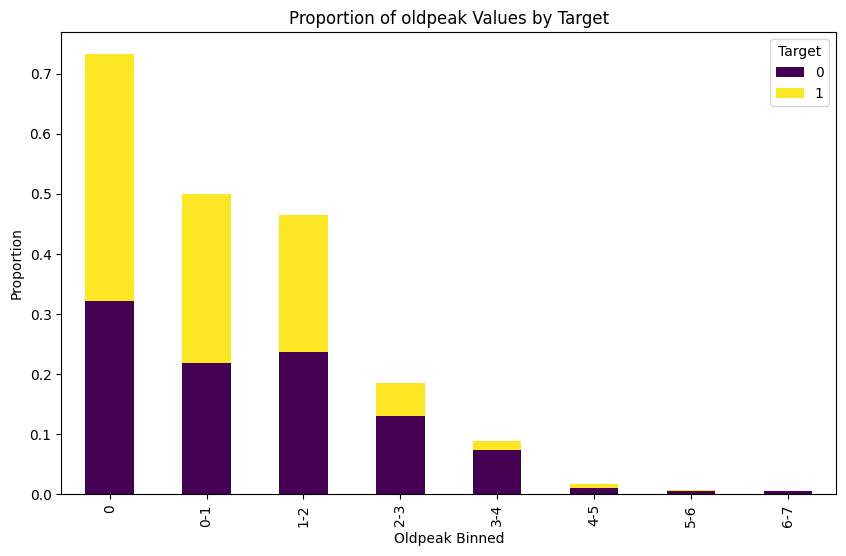

In [1004]:
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=[-0.1, 0, 1, 2, 3, 4, 5, 6, 7], labels=['0', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7'])

crosstab = pd.crosstab(df['oldpeak_binned'], df['target'], normalize='columns') 

crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Proportion of oldpeak Values by Target')
plt.xlabel('Oldpeak Binned')
plt.ylabel('Proportion')
plt.legend(title='Target')
plt.show()


In [1005]:
grouped = df.groupby(['oldpeak_binned', 'target']).size().unstack()
print(grouped)

target            0    1
oldpeak_binned          
0               354  444
0-1             240  305
1-2             260  247
2-3             143   59
3-4              80   18
4-5              11    7
5-6               6    1
6-7               5    1


/var/folders/42/481k8kj95w7cmh3m0mxvq4dw0000gn/T/ipykernel_75286/3030189999.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['oldpeak_binned', 'target']).size().unstack()


Based on the graph and the statistics, lower oldpeak values are more represented when target=1 and target=0 has more higher oldpeak values.

In [1006]:
print(df['target'].value_counts())

target
0    1099
1    1082
Name: count, dtype: int64


In [1007]:
print(df['oldpeak'].isna().sum())

0


The conclusion I made from the pairplot with oldpeakd and the target value seems to be right in this dataset, even though usually higher oldpeak indicates a risk for a heart disease. It is likely then that it is not a strong factor for the chance of a heart attack but for other hearth diseases and the strong representasion of low oldpeak values with high risk for a heart attack is because of other features and the relationship between oldpeak and a higher heart attack risk would only be indirect. I will dvelve more into this when exploring correlations and feature importance.

Next I will explore binary and catgorical values. They have already been encoded.

First, let's see if there are any categories that should not be there.

In [1008]:
binary_features = ['sex', 'fbs', 'exang']

for feature in binary_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    print(df[feature].unique())

[1 0]
[ 1.  0. nan]
[ 0.  1. nan]


The only unnecessary category is NaN but that does not matter because they will not be plotted ("errors='coerce'").

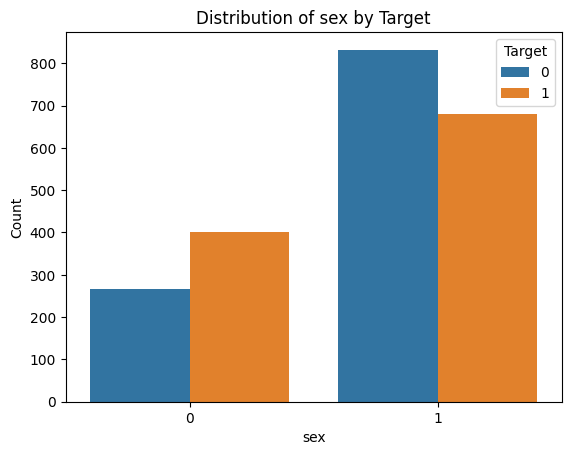

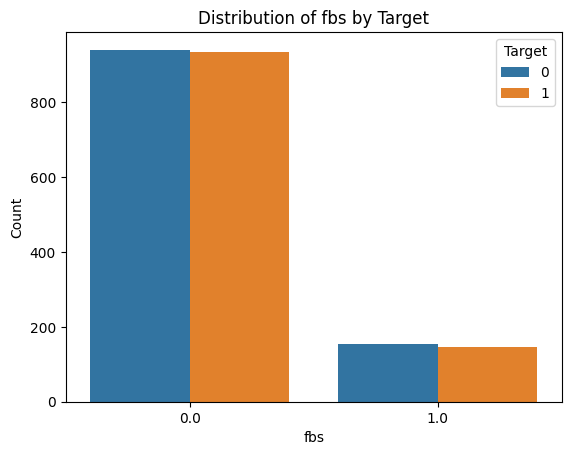

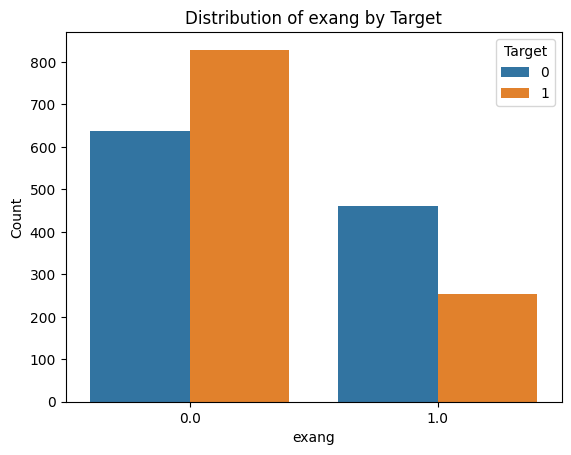

In [1009]:
for feature in binary_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.show()

In both target values, there are a significantly higher amount of males. Between males, there are more cases with a lesser chance of a heart attack and between females, there are more cases with a higher chance of a heart attack.

Overall, there is an immensly higher number of fbs=0. With both target values the distribution between these fbs values is extremely even, which means that it is not likely a good predictor atleast on it's own.

When exang=0 there are more target=1 than target=0 and vice versa when exang=1. This feature might have a similar situation than oldpeak. By that I mean that when exang=0 there are other underlying conditions and when exang=1 it might be associated with other conditions rather than a chance of a heart attack or they seek medical attention earlier and by that lowers their chances of a heart attack.

Next I will look into catgorical features. I will see if there are categories which should not be there and convert them to NaN if there are any.

In [1010]:
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal'] 

print(df[categorical_features].nunique())

cp         5
restecg    4
slope      5
ca         6
thal       7
dtype: int64


In [1011]:
for feature in categorical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    print(df[feature].unique())

[3 2 1 0 4]
[ 0.  1.  2. nan]
[ 0.  2.  1. nan  3.]
[ 0.  2.  1.  3.  4. nan]
[ 1.  2.  3.  0. nan  6.  7.]


In [1012]:
import numpy as np

df['cp'] = df['cp'].replace(4, np.nan)
df['slope'] = df['slope'].replace(3, np.nan)
df['ca'] = df['ca'].replace(4, np.nan)
df['thal'] = df['thal'].replace([0, 6, 7], np.nan)

In [1013]:
for feature in categorical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    print(df[feature].unique())

[ 3.  2.  1.  0. nan]
[ 0.  1.  2. nan]
[ 0.  2.  1. nan]
[ 0.  2.  1.  3. nan]
[ 1.  2.  3. nan]


After replacing incorrect categories with NaN values, I can look into the distributions of the categories between target values.

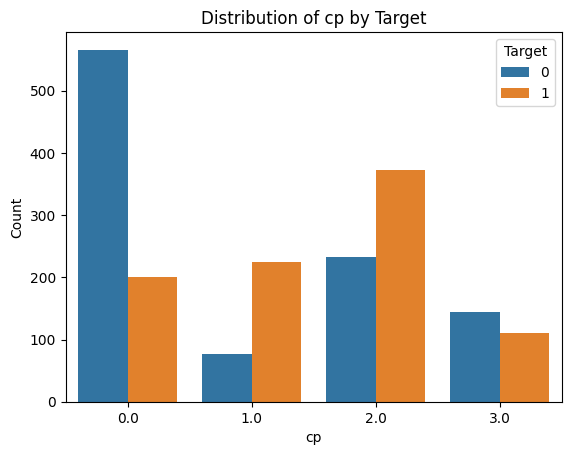

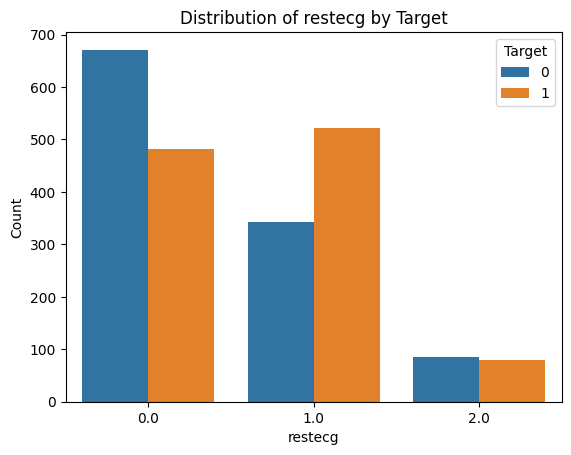

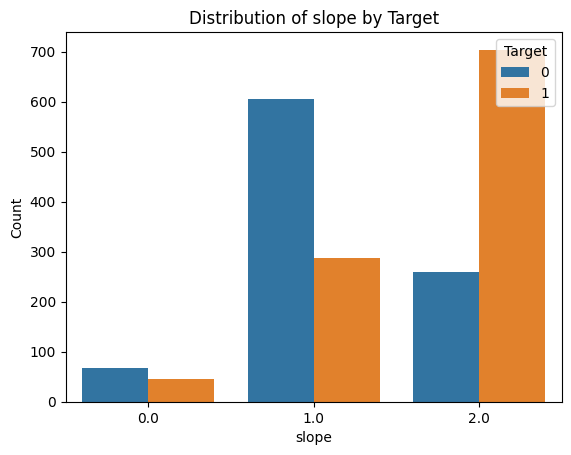

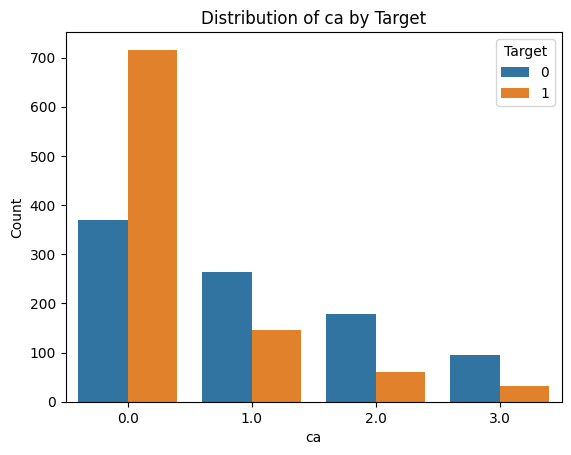

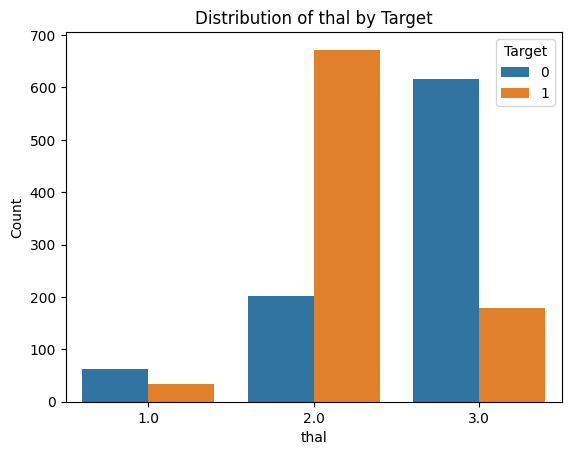

In [1014]:
for feature in categorical_features:
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.show()

When cp=0, there are nearly 3 times more cases that there is a lesser chance of a heart attack than a higher chance. When chest pain is 1 or 2 there are more cases that the patient has a higher chance of a heart attack.

When resctecg is 0 there clearly more cases when target value is 0. The distribution between target values are very even when restecg is 2 but when it's 1 there more cases with target=1.

Slope=1 and slope=2 are going most likely going to be good predictors as there is a clear difference between the distribution of target values between them. When slope=1 it is most likely that target=0 and vice versa when slope=2.

Ca will likely also be a solid predictor because when it's zero, target is most likely one and in other cases it's more likely to be zero.

The counts of the target values between thal=2 and thal=3 are very close but exactly the oppostie, which will most likely make the feature a good predictor. When thal=2 there are nearly 700 cases with target=1 and around 200 cases target=0 and when, thal=3 it's pretty accurately the opposite.

In [1015]:
print(df['target'].value_counts())

target
0    1099
1    1082
Name: count, dtype: int64


The target value is balanced, so we don't have to apply for example oversampling in the model.

# PREPROCESSING

In [1016]:
print(df.dtypes)

age                  int64
sex                  int64
cp                 float64
trestbps           float64
chol               float64
fbs                float64
restecg            float64
thalachh           float64
exang              float64
oldpeak            float64
slope              float64
ca                 float64
thal               float64
target               int64
oldpeak_binned    category
dtype: object


All the necessary features have been converted to numerical values before plotting them. I will drop oldpeak_binned, because it was only made for EDA.

In [1017]:
df = df.drop(columns=['oldpeak_binned'])

Handling missing values for numerical values

In [1018]:
print(df[numerical_features].isna().sum())

age          0
trestbps     1
chol        23
thalachh     1
oldpeak      0
dtype: int64


Filling missing values as medians

In [1019]:
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

Handling missing values for binary features

In [1020]:
print(df[binary_features].isna().sum())

sex      0
fbs      8
exang    1
dtype: int64


Replacing missing values with mode because there is only a few missing values. This affects the dataset minimally and this way we prevent data loss.

In [1021]:
for col in binary_features:
    df[col] = df[col].fillna(df[col].mode()[0])

Handling missing values for categorical feaures.

In [1022]:
print(df[categorical_features].isna().sum())

cp         252
restecg      1
slope      209
ca         319
thal       416
dtype: int64


In [1023]:
missing_proportion = df[categorical_features].isna().mean()
print(missing_proportion)

cp         0.115543
restecg    0.000459
slope      0.095828
ca         0.146263
thal       0.190738
dtype: float64


I will fill the missing values which are relatively low with modes of the features (everything except thal).

In [1024]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['cp'] = df['cp'].fillna(df['cp'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

I will treat the missing values in thal as a separate category because such a big proportion is missing.

In [1025]:
df['thal'] = df['thal'].fillna(-1)

In [1026]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Checking correlations

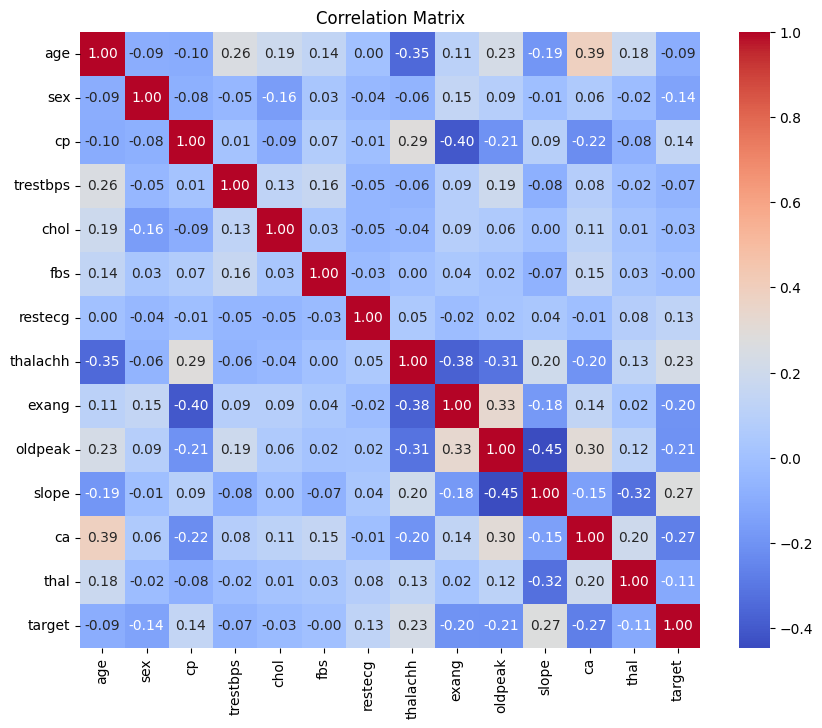

In [1027]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

None of the features correlate highly with each other so I won't drop any features for now.

Splitting the data into training, validation and test sets.

In [1028]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

# Split into train+validation and test (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train+validation into train and validation (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1308, 13)
Validation set shape: (436, 13)
Test set shape: (437, 13)


Scaling the data

In [1029]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# TRAINING MODELS

Let's start with baseline models

In [1030]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train_scaled, y_train)

y_val_pred_LR = model_LR.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_LR))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       221
           1       0.68      0.74      0.71       215

    accuracy                           0.70       436
   macro avg       0.70      0.70      0.70       436
weighted avg       0.70      0.70      0.70       436



In [1031]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_scaled, y_train)

y_val_pred_RF = model_RF.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       221
           1       0.95      0.93      0.94       215

    accuracy                           0.94       436
   macro avg       0.94      0.94      0.94       436
weighted avg       0.94      0.94      0.94       436



In [1032]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(random_state=42)
model_XGB.fit(X_train_scaled, y_train)

y_val_pred_XGB = model_XGB.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_XGB))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       221
           1       0.92      0.90      0.91       215

    accuracy                           0.91       436
   macro avg       0.91      0.91      0.91       436
weighted avg       0.91      0.91      0.91       436



In [1033]:
from sklearn.svm import SVC

model_SVC = SVC(random_state=42)
model_SVC.fit(X_train_scaled, y_train)

y_val_pred_SVC = model_SVC.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_SVC))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       221
           1       0.86      0.87      0.86       215

    accuracy                           0.86       436
   macro avg       0.86      0.86      0.86       436
weighted avg       0.86      0.86      0.86       436



In [1034]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)

y_val_pred_KNN = model_KNN.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred_KNN))


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       221
           1       0.82      0.84      0.83       215

    accuracy                           0.83       436
   macro avg       0.83      0.83      0.83       436
weighted avg       0.83      0.83      0.83       436



Based on the results of the baseline models I will choose Random Forest Classifier and XGBoost classifier and further improve them with dropping irrelevant features, if there are any, based on feature importance and with hyperparameter tuning.

In [1035]:
rf_baseline_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_RF.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Baseline Feature Importances:")
print(rf_baseline_importances)

Random Forest Baseline Feature Importances:
     Feature  Importance
12      thal    0.183563
7   thalachh    0.122829
9    oldpeak    0.098013
4       chol    0.095831
0        age    0.093779
3   trestbps    0.080203
2         cp    0.073499
11        ca    0.065521
10     slope    0.065191
6    restecg    0.051485
1        sex    0.029136
8      exang    0.026184
5        fbs    0.014765


In [1036]:
xgb_baseline_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_XGB.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("XGBoost Baseline Feature Importances:")
print(xgb_baseline_importances)

XGBoost Baseline Feature Importances:
     Feature  Importance
12      thal    0.221455
10     slope    0.118250
11        ca    0.103630
2         cp    0.089241
9    oldpeak    0.078215
5        fbs    0.071099
1        sex    0.059103
0        age    0.055390
6    restecg    0.052867
7   thalachh    0.045813
8      exang    0.037778
3   trestbps    0.036027
4       chol    0.031132


Thal is the most important feature for both models. XGBoost prioritizes slope, ca, and fbs more than Random Forest. Random Forest on the other hand finds thalachh much more important than XGBoost. Fbs has very low importance in Random Forest but moderate importance in XGBoost and thalachh is a key feature for Random Forest but less important for XGBoost. I will drop features which have a low importance on both of the baseline models: exang, fbs and sex. I will try the baseline models withouth the low-importance features.

In [1037]:
X_train_selected = X_train_scaled.drop(columns=['fbs', 'exang', 'sex'])
X_val_selected = X_val_scaled.drop(columns=['fbs', 'exang', 'sex'])
X_test_selected = X_test_scaled.drop(columns=['fbs', 'exang', 'sex'])

In [1038]:
from sklearn.metrics import accuracy_score

model_RF_retrained = RandomForestClassifier(random_state=42)
model_RF_retrained.fit(X_train_selected, y_train)

y_val_pred_rf = model_RF_retrained.predict(X_val_selected)
print("Validation Accuracy (Random Forest):", accuracy_score(y_val, y_val_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

Validation Accuracy (Random Forest): 0.9518348623853211
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       221
           1       0.97      0.93      0.95       215

    accuracy                           0.95       436
   macro avg       0.95      0.95      0.95       436
weighted avg       0.95      0.95      0.95       436



In [1039]:
model_XGB_retrained = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_XGB_retrained.fit(X_train_selected, y_train)

y_val_pred_xgb = model_XGB_retrained.predict(X_val_selected)
print("Validation Accuracy (XGBoost):", accuracy_score(y_val, y_val_pred_xgb))
print("Classification Report (XGBoost):")
print(classification_report(y_val, y_val_pred_xgb))

Validation Accuracy (XGBoost): 0.9151376146788991
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       221
           1       0.93      0.90      0.91       215

    accuracy                           0.92       436
   macro avg       0.92      0.91      0.92       436
weighted avg       0.92      0.92      0.92       436



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:23:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation accuracies got better by 0.1 for both of the models after dropping low-importance feature. Testing the models with dropped features with the test set.

In [1040]:
y_test_pred_rf = model_RF_retrained.predict(X_test_selected)
print("Test Accuracy (Random Forest):", accuracy_score(y_test, y_test_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

y_test_pred_xgb = model_XGB_retrained.predict(X_test_selected)
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_test_pred_xgb))
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))

Test Accuracy (Random Forest): 0.9473684210526315
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       217
           1       0.95      0.94      0.95       220

    accuracy                           0.95       437
   macro avg       0.95      0.95      0.95       437
weighted avg       0.95      0.95      0.95       437

Test Accuracy (XGBoost): 0.9382151029748284
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       217
           1       0.94      0.94      0.94       220

    accuracy                           0.94       437
   macro avg       0.94      0.94      0.94       437
weighted avg       0.94      0.94      0.94       437



I will implement gridsearch with cross validation for both of the models to see if I can further improve the models.

In [1041]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 150, 200],     
    'max_depth': [None, 10, 15],        
    'min_samples_split': [2, 3],           
    'min_samples_leaf': [1, 2],          
    'bootstrap': [True]                   
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy', 
    cv=5,           
    verbose=1,
    n_jobs=-1    
)

grid_search_rf.fit(X_train_selected, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.9434266327396099


In [1042]:
param_grid_xgb = {
    'learning_rate': [0.03, 0.05, 0.07], 
    'max_depth': [4, 5, 6],              
    'n_estimators': [100, 150, 200],       
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 1.0],      
    'gamma': [0, 0.1, 0.2],          
    'reg_lambda': [1, 5, 10]            
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5, 
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_selected, y_train)

print("Best Parameters XGBoost:", grid_search_xgb.best_params_)
print("Best Accuracy for XGBoost:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src

Best Parameters XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.9}
Best Accuracy for XGBoost: 0.9304232107864643


In [1043]:
print("Grid Search Cross-Validated Accuracy (RF):", grid_search_rf.best_score_)
print("Validation Accuracy after Grid Search (RF):", accuracy_score(y_val, grid_search_rf.best_estimator_.predict(X_val_selected)))
print()
print("Grid Search Cross-Validated Accuracy (XGB):", grid_search_xgb.best_score_)
print("Validation Accuracy after Grid Search (XGB):", accuracy_score(y_val, grid_search_xgb.best_estimator_.predict(X_val_selected)))

Grid Search Cross-Validated Accuracy (RF): 0.9434266327396099
Validation Accuracy after Grid Search (RF): 0.9357798165137615

Grid Search Cross-Validated Accuracy (XGB): 0.9304232107864643
Validation Accuracy after Grid Search (XGB): 0.9151376146788991


The validation accuracies did not get better after grid search even after tuning the grid search multiple times. I will still test the tuned models with the test set and see how they perform.

In [1044]:
y_test_pred_rf_grid = grid_search_rf.best_estimator_.predict(X_test_selected)
print("Test Accuracy (RF) (Grid Search):", accuracy_score(y_test, y_test_pred_rf_grid))
print("Test Accuracy (Random Forest) (Without Grid Search):", accuracy_score(y_test, y_test_pred_rf))
print()
y_test_pred_xgb_grid = grid_search_xgb.best_estimator_.predict(X_test_selected)
print("Test Accuracy (XGB) (Grid Search):", accuracy_score(y_test, y_test_pred_xgb_grid))
print("Test Accuracy (XGBoost) (Without Grid Search):", accuracy_score(y_test, y_test_pred_xgb))

Test Accuracy (RF) (Grid Search): 0.9473684210526315
Test Accuracy (Random Forest) (Without Grid Search): 0.9473684210526315

Test Accuracy (XGB) (Grid Search): 0.9359267734553776
Test Accuracy (XGBoost) (Without Grid Search): 0.9382151029748284


In [1045]:
print(classification_report(y_test, y_test_pred_rf_grid))
print(classification_report(y_test, y_test_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       217
           1       0.95      0.94      0.95       220

    accuracy                           0.95       437
   macro avg       0.95      0.95      0.95       437
weighted avg       0.95      0.95      0.95       437

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       217
           1       0.94      0.94      0.94       220

    accuracy                           0.94       437
   macro avg       0.94      0.94      0.94       437
weighted avg       0.94      0.94      0.94       437



After hyperparameter tuning, Random Forest Classifier performs exactly the same as the RFC model without grid search. XGBoost classifier performs better on the test set without gridsearch. The best performing model is Random Forest Classifier and the model I would choose is the version before grid search as it is already well optimized for the data.

In conclusion, Random Forest Classifier consistently outperformed XGBoost in terms of accuracy and other performance metrics. While XGBoost Classifier was slighlty less accurate, it demonstrated competetive performance. Through multiple iterations of grid searches, by changing their complexity and parameters, I did not manage to improve the baseline models. With a simple grid search for Random FOrest CLassifier, I managed to get same test accuracy than the baseline model, which means that the baseline model is already well optimized for the data. Even through multiple iterations of grid search I did not manage to improve XGBoost Classifier and it constanlty performed worse even though only very slightly on the test set. On the validation set, I managed to get the same accuracy than the baseline model.